In [1]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST
import os

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# ls('./data')

# import os
# os.getcwd()

# pwd

!ls ./data/MNIST/raw/train-images-idx3-ubyte

ls: cannot access './data/MNIST/raw/train-images-idx3-ubyte': No such file or directory


In [2]:
train = MNIST('./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

# Create DataLoader
dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)

0it [00:00, ?it/s]

9920512it [00:08, 1235798.21it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 57421.12it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 973430.72it/s]                             
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21659.32it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
# dataloader_args


In [0]:
# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.view((-1, 784))
        h = F.relu(self.fc(x))
        h = self.fc2(h)
        return F.softmax(h)    
    
    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3)

**Begining of the signal in NOISE analysis**

In [3]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST
import os

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 1)

    def forward(self, x):
        x = x.view((-1, 784))
        h = F.relu(self.fc(x))
        h = F.sigmoid(self.fc2(h))
        return h
#         return F.softmax(h)    
      
    
    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 2)

    def forward(self, x):
        x = x.view((-1, 784))
        h = F.relu(self.fc(x))
        h = self.fc2(h)
        return F.softmax(h, dim=1)    
    
    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3)





#  CNN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 40, 5, 1)
        self.conv2 = nn.Conv2d(40, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 100)
        self.fc2 = nn.Linear(100, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.softmax(x, dim=1)
        h = F.sigmoid(self.fc2(x))
        return h

    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3) 
    


In [0]:
# # A binary classifier

# from torchvision import datasets, transforms

# def mnist_data():
#     compose = transforms.Compose(
#         [
#          transforms.ToTensor(),
#          transforms.Normalize((.5), (.5))         
# #          transforms.Normalize((.5, .5, .5), (.5, .5, .5))
#         ])
# #     transform = transforms.Compose([transforms.Resize(64),   # scale!!!!!
# #         transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])    

#     transform = transforms.Compose([
#         transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])    

    
#     out_dir = './dataset'
#     return datasets.MNIST(root=out_dir, train=True, transform=transform, download=True)



train = MNIST('./data', train=True,   download=True
    , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )
  


In [10]:
# Load data

# digit_p, digit_q =  2, 7

# digit_p, digit_q =  4,9
digit_p, digit_q =  5,6

# digit_p, digit_q =  1,7


data1 = train
# selecting number 0 zero only
tt = data1.targets[(data1.targets== digit_p) | (data1.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data1.data[(data1.targets== digit_p) | (data1.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data1.targets = tt
data1.data = dd
train_loader = torch.utils.data.DataLoader(data1, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)

print((tt==0).sum(), (tt==1).sum())





data2 = test
# selecting number 0 zero only
tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data2.targets = tt
data2.data = dd
test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)
print((tt==0).sum(), (tt==1).sum())

tensor(5421) tensor(5918)
tensor(892) tensor(958)


In [18]:
# a = (data.targets== 1) | (data.targets== 2)
# num_batches
# target.cuda()
# (test.targets==-1).sum()
# (data.targets==5).sum()
# len(tt)
# (tt==0).sum()


from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# data.targets[100]
a = torch.ByteTensor([0,1,1,0])
b = torch.ByteTensor([0,1,0,1])

In [0]:
a.dtype
a | b
(data.targets==1) 

AttributeError: ignored

In [0]:
# data.data.shape


def one_hot(target):
#   one hot encoding
  batch_size = target.size(0)
  nb_digits = 2
  # Dummy input that HAS to be 2D for the scatter (you can use view(-1,1) if needed)
  # y = torch.LongTensor(target.size(0),1).random_() % nb_digits
  # One hot encoding buffer that you create out of the loop and just keep reusing
  y_onehot = torch.FloatTensor(batch_size, nb_digits)

  # In your for loop
  y_onehot.zero_()
  y_onehot.scatter_(1, target[:,None].type(torch.LongTensor), 1)
  target = y_onehot
  
  return target




In [59]:
# GPU compatible
EPOCHS = 20
losses = []
BCE_loss = nn.BCELoss()

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
#         import pdb; pdb.set_trace()
        data, target = Variable(data/256), Variable(target)
        
        if cuda:
            data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data).squeeze(1) #.cuda()

        # Calculate loss
        target = target.type(torch.FloatTensor)#.cuda()
        y_pred = y_pred.type(torch.FloatTensor)#.cuda()

#         loss = F.cross_entropy(y_pred, target)
        
#         target = one_hot(target)


#         import pdb; pdb.set_trace()
        loss = BCE_loss(y_pred, target)
        
        losses.append(loss.cpu().data)
#         losses.append(loss.cpu().data[0])        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.cpu().data), 
                end='')
    # Eval
#     evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
#     evaluate_y = Variable(test_loader.dataset.test_labels)
    evaluate_x = test.data.type(torch.FloatTensor)/256 # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
    evaluate_y = test.targets #Variable(test_loader.dataset.test_labels)    
    
#     evaluate_y = one_hot(evaluate_y)
    
    
    if cuda:
        evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

    model.eval()
    output = model(evaluate_x[:,None,...])
#     pred = output.data.max(1)[1]
    pred = output.type(torch.ByteTensor).squeeze()
    evaluate_y = evaluate_y.type(torch.ByteTensor)

    
#     import pdb; pdb.set_trace()
    d = pred.eq(evaluate_y.data).cpu()

#     vals, idxs = pred.max(dim=1)
#     vals2, idxs2 = evaluate_y.data.max(dim=1)
#     d = idxs.eq(idxs2).cpu()
    accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        len(train_loader.dataset), 
        len(train_loader.dataset),
        100. * batch_idx / len(train_loader), 
        loss.cpu().data,
        accuracy*100,
        end=''))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


 Train Epoch: 1/20 [11339/11339 (99%)]	Loss: 0.691935	 Test Accuracy: 48.2162%
 Train Epoch: 2/20 [11339/11339 (99%)]	Loss: 0.689214	 Test Accuracy: 48.2162%
 Train Epoch: 3/20 [11339/11339 (99%)]	Loss: 0.257038	 Test Accuracy: 87.7297%
 Train Epoch: 4/20 [11339/11339 (99%)]	Loss: 0.064174	 Test Accuracy: 88.6486%
 Train Epoch: 5/20 [11339/11339 (99%)]	Loss: 0.145774	 Test Accuracy: 89.3514%
 Train Epoch: 6/20 [11339/11339 (99%)]	Loss: 0.079312	 Test Accuracy: 91.0270%
 Train Epoch: 7/20 [11339/11339 (99%)]	Loss: 0.125870	 Test Accuracy: 92.7027%
 Train Epoch: 8/20 [11339/11339 (99%)]	Loss: 0.122381	 Test Accuracy: 94.1081%
 Train Epoch: 9/20 [11339/11339 (99%)]	Loss: 0.098577	 Test Accuracy: 94.6486%
 Train Epoch: 10/20 [11339/11339 (99%)]	Loss: 0.056769	 Test Accuracy: 95.7297%
 Train Epoch: 11/20 [11339/11339 (99%)]	Loss: 0.043718	 Test Accuracy: 96.2703%
 Train Epoch: 12/20 [11339/11339 (99%)]	Loss: 0.034392	 Test Accuracy: 96.3243%
 Train Epoch: 13/20 [11339/11339 (99%)]	Loss: 0.0

In [0]:
y_onehot = torch.FloatTensor(3, 3)
y_onehot.zero_()
y_onehot.scatter_(

SyntaxError: ignored

In [0]:
# this worked with TPU
EPOCHS = 30
losses = []
BCE_loss = nn.BCELoss()

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
#         import pdb; pdb.set_trace()
        data, target = Variable(data), Variable(target)
        
#         if cuda:
#             data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data).squeeze(1)

        # Calculate loss
        target = target.type(torch.FloatTensor)#.cuda()
        y_pred = y_pred.type(torch.FloatTensor)#.cuda()

#         loss = F.cross_entropy(y_pred, target)
        loss = BCE_loss(y_pred, target)
        
        losses.append(loss.cpu().data)
#         losses.append(loss.cpu().data[0])        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.cpu().data), 
                end='')
    # Eval
#     evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
#     evaluate_y = Variable(test_loader.dataset.test_labels)
    evaluate_x = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
    evaluate_y = test.targets #Variable(test_loader.dataset.test_labels)    
    if cuda:
        evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

    model.eval()
    output = model(evaluate_x[:,None,...])
#     pred = output.data.max(1)[1]
    pred = output.type(torch.ByteTensor).squeeze()
    evaluate_y = evaluate_y.type(torch.ByteTensor)

    d = pred.eq(evaluate_y.data).cpu()
    accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        len(train_loader.dataset), 
        len(train_loader.dataset),
        100. * batch_idx / len(train_loader), 
        loss.cpu().data,
        accuracy*100,
        end=''))
    

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


 Train Epoch: 1/30 [13007/13007 (99%)]	Loss: 0.052242	 Test Accuracy: 99.3528%
 Train Epoch: 2/30 [13007/13007 (99%)]	Loss: 0.002052	 Test Accuracy: 99.6301%
 Train Epoch: 3/30 [13007/13007 (99%)]	Loss: 0.004209	 Test Accuracy: 99.7226%
 Train Epoch: 4/30 [13007/13007 (99%)]	Loss: 0.000672	 Test Accuracy: 99.7688%
 Train Epoch: 5/30 [13007/13007 (99%)]	Loss: 0.017979	 Test Accuracy: 99.8613%
 Train Epoch: 6/30 [13007/13007 (99%)]	Loss: 0.000421	 Test Accuracy: 99.6764%
 Train Epoch: 7/30 [13007/13007 (99%)]	Loss: 0.000106	 Test Accuracy: 99.8613%
 Train Epoch: 8/30 [13007/13007 (99%)]	Loss: 0.013088	 Test Accuracy: 99.7226%
 Train Epoch: 9/30 [13007/13007 (99%)]	Loss: 0.005762	 Test Accuracy: 99.8613%
 Train Epoch: 10/30 [13007/13007 (99%)]	Loss: 0.000750	 Test Accuracy: 99.7688%
 Train Epoch: 11/30 [13007/13007 (99%)]	Loss: 0.003983	 Test Accuracy: 99.7688%
 Train Epoch: 12/30 [13007/13007 (99%)]	Loss: 0.000213	 Test Accuracy: 99.7688%
 Train Epoch: 13/30 [13007/13007 (99%)]	Loss: 0.0

In [9]:
evaluate_x = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
evaluate_y = test.targets #Variable(test_loader.dataset.test_labels)
if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda()/256, evaluate_y.cuda()

model.eval()
output = model(evaluate_x[:,None,...])
# pred = output.data.max(1)[1]
pred = output.type(torch.ByteTensor).squeeze()
evaluate_y = evaluate_y.type(torch.ByteTensor)

d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]

print('Accuracy:', accuracy*100)

Accuracy: tensor(98.1507, dtype=torch.float64)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
evaluate_y
pred.max()
output.min()
output.shape
pred.shape

torch.Size([2163])

In [0]:
# data.cpu()
# y_pred.squeeze(1).shape
e = target.type(torch.BoolTensor)
# BCE_loss(e, e)
# y_pred.dtype
# target
y_pred.max()
# target.dtype

tensor(1.0000, grad_fn=<MaxBackward1>)

In [0]:
# target[44]
d, r = next(iter((train_loader)))
r

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1])

In [0]:
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256


In [7]:
(test.targets==0).sum()
test_data.size(0)

NameError: ignored

In [11]:
# embed the signal in noise

# - get a random test digit and add it to random noise
# - feed to the net and collect the answer
# - do record the averages


# model.cuda()
model.eval()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256


#     output = model(evaluate_x[:,None,...])



batch_size = test_data.size(0)
all_size = batch_size * 1

stats = dict()
for i in range(2):
    stats[i] = 0

iters = 1    
    
avgs = torch.zeros(iters, 2, 28*28)


weight = 100

for kk in range(iters):
  print(kk)
  
#   z = torch.rand(all_size, 1, 28, 28)*2 -1 #.cuda()
  z = torch.rand(all_size, 28, 28) #.cuda()  
  z.cuda()
  #plt.imshow(z[1].reshape(28,28))


  all_preds = []
  all_idx = torch.ones(all_size, dtype = torch.uint8)
  for k in range(0, all_size, batch_size):
#       stimulus = z[k:k+batch_size] + test_data  # noise + stim
#       kk = (test_data[0] + 5*z[0])/5
      stimulus = (1*z[k:k+batch_size] + weight*test_data)/ (weight+1)  # noise + stim
        
      y_pred = model(test_data[:,None,...].cuda())
      
      conf, pred = y_pred.data.max(1)
#       y_pred[y_pred < 0.5]= 0
#       y_pred[y_pred > 0.5]= 1      
      z[k:k+batch_size] = stimulus

#       import pdb; pdb.set_trace()
  
#       indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
#       indices[torch.mean(y_pred, dim =1)==0] = 0 
#       import pdb; pdb.set_trace()
      all_idx[k:k+batch_size] = pred.squeeze() 
#       pred = y_pred[indices==1].data.max(1)[1]

      all_preds.append(pred)
#       all_preds.append(y_pred)

  pred = torch.cat(all_preds).squeeze()

  for i in range(2):
    stats[i] += torch.sum(all_idx==i)
  
#   z = z[all_idx]
  for i in range(2):
      a = torch.mean(z[pred==i], dim=0) 
      avgs[kk, i] = a.reshape(28*28)

print(stats)

0
{0: tensor(1850), 1: tensor(0)}


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
# # embed the signal in noise

# # - get a random test digit and add it to random noise
# # - feed to the net and collect the answer
# # - do record the averages

# # Load data

# # digit_p, digit_q =  1, 7


# test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
#     transforms.ToTensor(), # ToTensor does min-max normalization. 
# ]), )

# data2 = test
# # selecting number 0 zero only
# tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
# tt[tt==digit_p] =  0
# tt[tt==digit_q] = 1
# dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# # tt = data.targets[(data.targets== 1)]
# # dd = data.data[(data.targets== 1)] 

# data2.targets = tt
# data2.data = dd
# test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# # Num batches
# # num_batches = len(train_loader)
# print((tt==0).sum(), (tt==1).sum())

# # model.cuda()
# model.eval()
# test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
# test_data = test_data/256


# #     output = model(evaluate_x[:,None,...])

# batch_size = test_data.size(0)
# all_size = batch_size * 1

# stats = dict()
# for i in range(2):
#     stats[i] = 0

# iters = 1    
    
# avgs = torch.zeros(iters, 2, 28*28)


# weight = 0.3

# for kk in range(iters):
#   print(kk)
  
#   z = torch.rand(all_size, 28, 28) #.cuda()  
#   z.cuda()

#   # z = (1*z + weight*test_data)/ (weight+1)  # noise + stim
#   z = (1-weight)*z + weight*test_data #/ (weight+1)  # noise + stim

#   pred = model(z[:,None,...].cuda())

#   for i in range(2):
#     stats[i] += torch.sum(pred==i)
  
#   for i in range(2):
#       a = torch.mean(z[pred.squeeze()==i], dim=0) 
#       avgs[kk, i] = a.reshape(28*28)

# print(stats)

# # plot the avg
# dd = torch.mean(avgs, dim=0)
# for kk in range(2):
#   fig = plt.figure()
#   a = dd[kk]
#   a = a.view(-1,28)
#   plt.imshow(a, cmap = 'gray')

  
  
# # plot few samples  
# for p in range(2):
# #   pred.shape
#   # z.shape
#   z = torch.rand(all_size, 28, 28)

#   # plt.imshow(stimulus[1])
#   plt.figure()
#   kk = (1*z[p] + weight*test_data[p])/ (weight+1)
# #   (test_data[110] + 5*z[p])/5

#   # plt.imshow(z[k:k+batch_size][0])
#   plt.imshow(kk)
#   # batch_size
#   # z[k:k+batch_size][0].shape
#   # z[k:k+batch_size][0].max()
#   print(kk.min(), kk.max())
#   print(z[p].min(), z[p].max())
#   print(test_data[p].min(), test_data[p].max())

#   plt.figure()
#   plt.imshow(test_data[p])
  
#   plt.figure()
#   plt.imshow(z[p])
    

tensor(892) tensor(958)


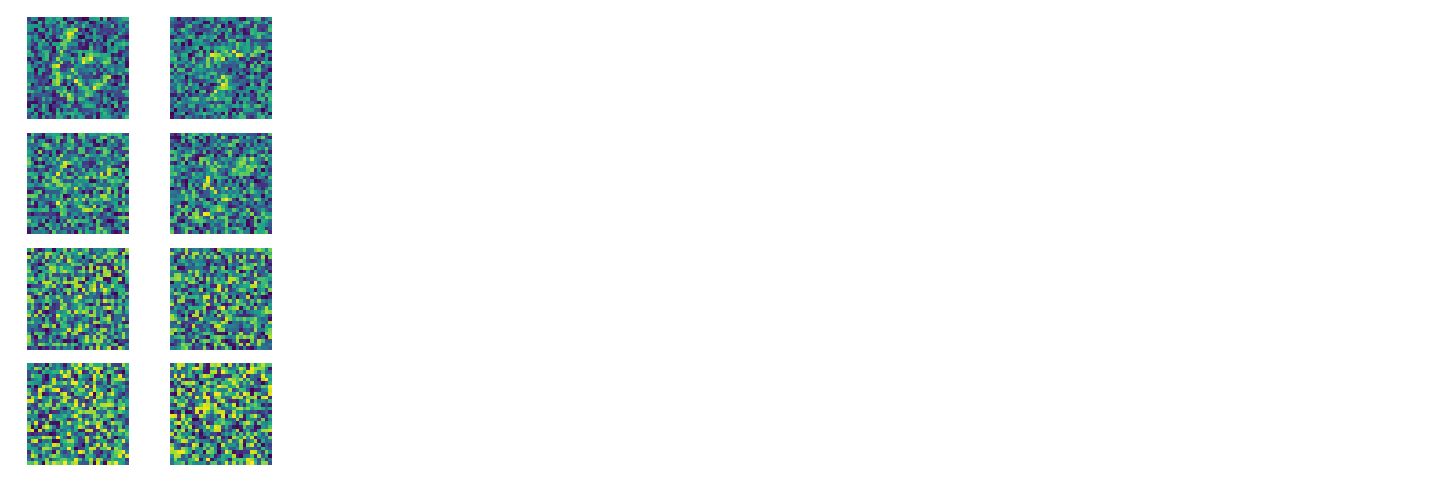

In [12]:
# embed the signal in noise

# - get a random test digit and add it to random noise
# - feed to the net and collect the answer
# - do record the averages

# Load data

# digit_p, digit_q =  1, 7


test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

data2 = test
# selecting number 0 zero only
tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data2.targets = tt
data2.data = dd
test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)
print((tt==0).sum(), (tt==1).sum())

# model.cuda()
model.eval()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256



f, axarr = plt.subplots(4, 10, )
f.set_figheight(7)
f.set_figwidth(20)




# weight = 0.3
# for idx, weight in enumerate([.6, .1, 0.05, 0]):
for idx, weight in enumerate([.3, .2, 0.1, 0]):

  # plot few samples  
  for kk, p in enumerate([1, 1300]): # range(2):
  #   pred.shape
    # z.shape
    z = torch.rand(28, 28)

    # plt.imshow(stimulus[1])
    # plt.figure()
    # kk = (1*z[p] + weight*test_data[p])/ (weight+1)
    img = (1-weight)*z + weight*test_data[p] #/ (weight+1)  # noise + stim
  #   (test_data[110] + 5*z[p])/5

    axarr[idx, kk].imshow(img)    
    # if not idx:
    #   axarr[idx, 0].set_title(f'predicted: {digit_p} - gt:{digit_p}') 
    axarr[idx,kk].axis('off')

  for kk in range(2,10): # range(2):
    axarr[idx, kk].axis('off')

    # # plt.imshow(z[k:k+batch_size][0])
    # plt.imshow(kk)
    # # batch_size
    # # z[k:k+batch_size][0].shape
    # # z[k:k+batch_size][0].max()
    # print(kk.min(), kk.max())
    # print(z[p].min(), z[p].max())
    # print(test_data[p].min(), test_data[p].max())

    # plt.figure()
    # plt.imshow(test_data[p])
    
    # plt.figure()
    # plt.imshow(z[p])

    plt.tight_layout()


    f.subplots_adjust(hspace=0) #, wspace=0.0, right = 0.8)
    f.show()

    

In [0]:
pred.shape
all_size
(test_targets == 0).sum() + (test_targets == 1).sum()
(pred == 1).sum()


tensor(986, device='cuda:0')

In [0]:
z.min()
# test_data.max()

tensor(4.0531e-07)

tensor(892) tensor(958)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


{0: tensor(443952, device='cuda:0'), 1: tensor(178751, device='cuda:0'), 2: tensor(497, device='cuda:0'), 3: tensor(212355, device='cuda:0')}
{0: tensor(889165, device='cuda:0'), 1: tensor(568034, device='cuda:0'), 2: tensor(642, device='cuda:0'), 3: tensor(249755, device='cuda:0')}
{0: tensor(1334663, device='cuda:0'), 1: tensor(1038230, device='cuda:0'), 2: tensor(704, device='cuda:0'), 3: tensor(251585, device='cuda:0')}
{0: tensor(1780103, device='cuda:0'), 1: tensor(1516611, device='cuda:0'), 2: tensor(786, device='cuda:0'), 3: tensor(251671, device='cuda:0')}


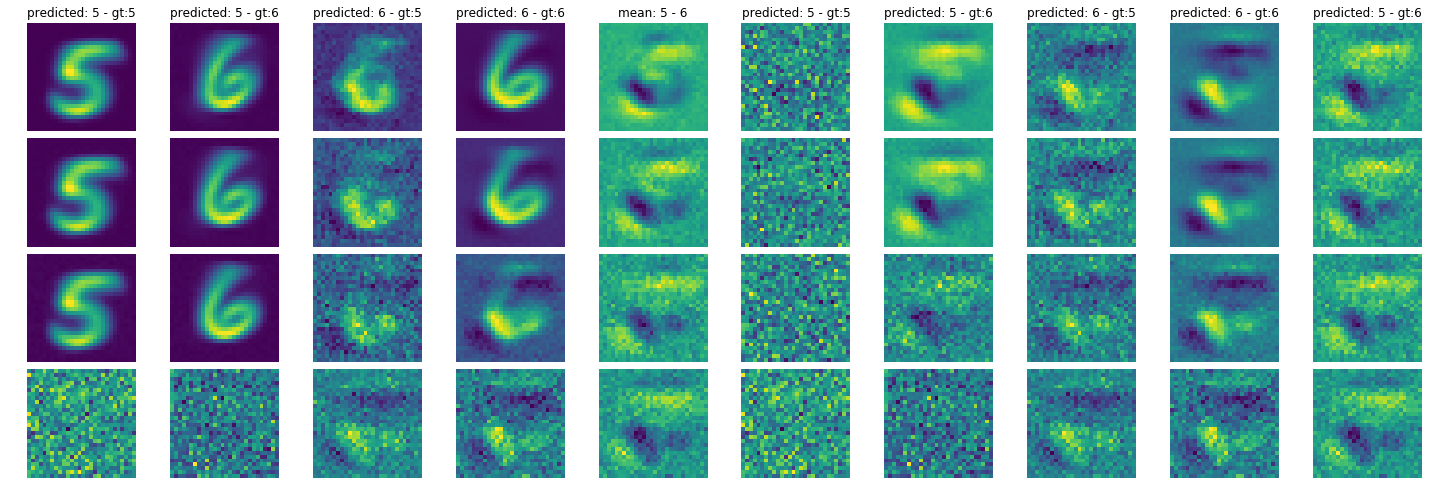

In [60]:
# embed the signal in noise


#.  WARNING: for some well-trained classifiers!! it may not produce good results. Try to train another classifier


# - get a random test digit and add it to random noise
# - feed to the net and collect the answer
# - do record the averages

# Load data

# digit_p, digit_q =  1, 7


test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

data2 = test
# selecting number 0 zero only
tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data2.targets = tt
data2.data = dd
test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)
print((tt==0).sum(), (tt==1).sum())

# model.cuda()
model.eval()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256

test_targets = test.targets.cuda()
#     output = model(evaluate_x[:,None,...])



batch_size = test_data.size(0)
all_size = batch_size * 1

stats = dict()
for i in range(4):
    stats[i] = 0

# avgs = torch.zeros(iters, 2, 28*28)




# weight = 0.3


f, axarr = plt.subplots(4, 10, )
f.set_figheight(7)
f.set_figwidth(20)


iters = 500 # !!
    


# for idx, weight in enumerate([1, .8, .6, .4, .2, 0]):
for idx, weight in enumerate([.3, .2, 0.1, 0]):

    p0_0 = [] 
    p0_1 = [] 
    p1_0 = [] 
    p1_1 = [] 
    p0_0_z = [] 
    p0_1_z = [] 
    p1_0_z = [] 
    p1_1_z = [] 


    for kk in range(iters):
            # print(kk)
            
            z_orig = torch.rand(all_size, 28, 28) #.cuda()  
            z_orig.cuda()

            # z = (1*z + weight*test_data)/ (weight+1)  # noise + stim

            z = (1-weight)*z_orig + weight*test_data #/ (weight+1)  # noise + stim
            z.cuda()

            pred = model(z[:,None,...].cuda())
            
            pred = pred.squeeze()
            
          #   idx = (pred.squeeze()==0) & (test_targets==0)
            
          #   z[idx].mean(dim=0)
          #   import pdb; pdb.set_trace() 
            idx0 = (pred==0) & (test_targets==0)   # it was 1 predicted 1
            p0_0.append(z[idx0].mean(dim=0))
            p0_0_z.append(z_orig[idx0].mean(dim=0))            
            
            idx1 = (pred==0) & (test_targets==1)   # it was 7 predicted 1
            p0_1.append(z[idx1].mean(dim=0))
            p0_1_z.append(z_orig[idx1].mean(dim=0))      

            idx2 = (pred==1) & (test_targets==0)   # it was 1 predicted 7
            sum2 = z[idx2].mean(dim=0)
            if not torch.isnan(sum2).sum():
              p1_0.append(sum2)
              p1_0_z.append(z_orig[idx2].mean(dim=0))                    

            idx3 = (pred==1) & (test_targets==1)   # it was 7 predicted 7
            sum3 = z[idx3].mean(dim=0)
            if not torch.isnan(sum3).sum():  
              p1_1.append(sum3)
              p1_1_z.append(z_orig[idx3].mean(dim=0))                    
            
            
            stats[0] += idx0.sum()
            stats[1] += idx1.sum()
            stats[2] += idx2.sum()
            stats[3] += idx3.sum()

          #   for i in range(2):
          #     stats[i] += torch.sum(pred==i)
      

    #   import pdb; pdb.set_trace()
    # for i in range(4):
    p0_0 = torch.stack(p0_0)#.squeeze()  
    a = torch.mean(p0_0, dim=0)
    axarr[idx, 0].imshow(a)    
    if not idx:
      axarr[idx, 0].set_title(f'predicted: {digit_p} - gt:{digit_p}') 
    axarr[idx,0].axis('off')
   

    # ------------  z  -----------------
    p0_0_z = torch.stack(p0_0_z)#.squeeze()  
    a_z = torch.mean(p0_0_z, dim=0)
    axarr[idx, 5].imshow(a_z)    
    if not idx:
      axarr[idx, 5].set_title(f'predicted: {digit_p} - gt:{digit_p}') 
    axarr[idx,5].axis('off')



    # plt.figure()
    # plt.imshow(a)

    p0_1 = torch.stack(p0_1)#.squeeze()  
    b = torch.mean(p0_1, dim=0)
    axarr[idx, 1].imshow(b)    
    if not idx:    
      axarr[idx, 1].set_title(f'predicted: {digit_p} - gt:{digit_q}') 
    axarr[idx,1].axis('off')
   


    # ------------  z  -----------------
    p0_1_z = torch.stack(p0_1_z)#.squeeze()  
    b_z = torch.mean(p0_1_z, dim=0)
    axarr[idx, 6].imshow(b_z)    
    if not idx:
      axarr[idx, 6].set_title(f'predicted: {digit_p} - gt:{digit_q}') 
    axarr[idx,6].axis('off')



    # plt.imshow(b)

    p1_0 = torch.stack(p1_0)#.squeeze()  
    c = torch.mean(p1_0, dim=0)
    axarr[idx, 2].imshow(c)    
    if not idx:    
      axarr[idx, 2].set_title(f'predicted: {digit_q} - gt:{digit_p}')    
    axarr[idx,2].axis('off')

    # plt.imshow(c)

    # ------------  z  -----------------
    p1_0_z = torch.stack(p1_0_z)#.squeeze()  
    c_z = torch.mean(p1_0_z, dim=0)
    axarr[idx, 7].imshow(c_z)    
    if not idx:
      axarr[idx, 7].set_title(f'predicted: {digit_q} - gt:{digit_p}') 
    axarr[idx,7].axis('off')




    p1_1 = torch.stack(p1_1)#.squeeze()  
    d = torch.mean(p1_1, dim=0)
    axarr[idx, 3].imshow(d)    
    if not idx:    
      axarr[idx, 3].set_title(f'predicted: {digit_q} - gt:{digit_q}')    
    axarr[idx,3].axis('off')

    # ------------  z  -----------------
    p1_1_z = torch.stack(p1_1_z)#.squeeze()  
    d_z = torch.mean(p1_1_z, dim=0)
    axarr[idx, 8].imshow(d_z)    
    if not idx:
      axarr[idx, 8].set_title(f'predicted: {digit_q} - gt:{digit_q}') 
    axarr[idx, 8].axis('off')

    # plt.figure()
    # plt.imshow(d)



    # classification_img = (a+b) - (c+d)
    # plt.figure()
    # plt.imshow(classification_img)

    classification_img = (a+b)  - (c+d)   #  (p0_0 + p1_0) - (p0_1 + p1_1)  (predicted sevens - predicted ones)
    # plt.figure()
    # plt.imshow(classification_img)
    axarr[idx, 4].imshow(classification_img)
    if not idx:      
      axarr[idx, 4].set_title(f'mean: {digit_p} - {digit_q}')
    axarr[idx,4].axis('off')


    # ------------  z  -----------------
    classification_img_z = (a_z+b_z)  - (c_z+d_z)   #  (p0_0 + p1_0) - (p0_1 + p1_1)  (predicted sevens - predicted ones)
    axarr[idx, 9].imshow(classification_img_z)
    if not idx:
      axarr[idx, 9].set_title(f'predicted: {digit_p} - gt:{digit_q}') 
    axarr[idx,9].axis('off')






    plt.tight_layout()


    f.subplots_adjust(hspace=0) #, wspace=0.0, right = 0.8)
    f.show()

    # classification_img2 = (c+d) - (a+b)   #  (p0_0 + p1_0) - (p0_1 + p1_1)  (predicted sevens - predicted ones)
    # plt.figure()
    # plt.imshow(classification_img2)



    print(stats)






In [57]:
# p0_1
# z[idx1]
axarr.shape
jj

0

In [0]:
digit_q

7

In [0]:
# tSNE

!pip install swat

     |████████████████████████████████| 45.6MB 1.9MB/s 


In [0]:
# import swat
# import seaborn as sns

# # Create CAS Connection
# conn = swat.CAS(host, portnum, protocol='http')
# conn.sessionProp.setSessOpt(messageLevel='NONE'); # Suppress CAS Messages


# # Load CAS Action Sets
# conn.loadactionset('pca')
# conn.loadactionset('tsne');


# # Upload Digits and MNIST Data to CAS Server
# digits_cas = conn.upload_frame(digits, casout=dict(name='digits_df', replace=True))
# mnist_cas = conn.upload_frame(mnist, casout=dict(name='mnist_df', replace=True));

# # Perform PCA: MNIST
# pca_mnist = conn.eig(table='mnist_df',
#                      n=30,
#                      output={'casOut':{'name':'pca_mnist','replace':'TRUE'},
#                              'copyVars':['ID','Label']})

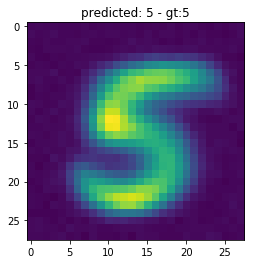

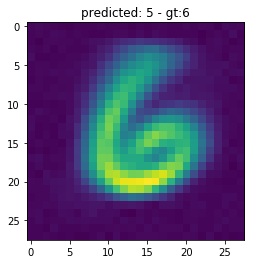

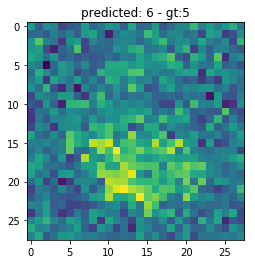

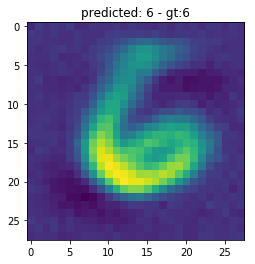

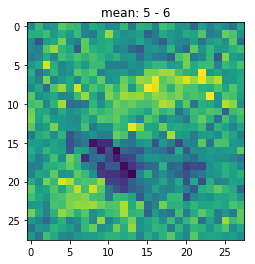

In [46]:

# save_path = 'drive/My Drive/classification_images/Binary_case/' + str(digit_p) + '_' + str(digit_q) + '/thresh_' + str(weight)

# import os
# if not os.path.exists(save_path):
#     os.makedirs(save_path)


# # plt.title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} - conf: {str(conf.cpu().data[0].numpy())} -  size-gt: {stats[kk]}')  
# # plt.imshow(a) #, cmap = 'gray')
# #fig.savefig(os.path.join(save_path, str(kk)+'-.png'))

# # p0_0 = torch.stack(p0_0)#.squeeze()  
# a = torch.mean(p0_0, dim=0)
# fig = plt.figure()
# plt.imshow(a)
# plt.title(f'predicted: {digit_p} - gt:{digit_p}')
# fig.savefig(os.path.join(save_path, '1-1.png'))

# # p0_1 = torch.stack(p0_1)#.squeeze()  
# b = torch.mean(p0_1, dim=0)
# fig = plt.figure()
# plt.imshow(b)
# plt.title(f'predicted: {digit_p} - gt:{digit_q}')
# fig.savefig(os.path.join(save_path, '1-7.png'))

# # p1_0 = torch.stack(p1_0)#.squeeze()  
# c = torch.mean(p1_0, dim=0)
# fig = plt.figure()
# plt.imshow(c)
# plt.title(f'predicted: {digit_q} - gt:{digit_p}')
# fig.savefig(os.path.join(save_path, '7-1.png'))


# # p1_1 = torch.stack(p1_1)#.squeeze()  
# d = torch.mean(p1_1, dim=0)
# fig = plt.figure()
# plt.imshow(d)
# plt.title(f'predicted: {digit_q} - gt:{digit_q}')
# fig.savefig(os.path.join(save_path, '7-7.png'))


# # classification_img = (a+b) - (c+d)
# # plt.figure()
# # plt.imshow(classification_img)

# classification_img = (a+b)  - (c+d)   #  (p0_0 + p1_0) - (p0_1 + p1_1)  (predicted sevens - predicted ones)
# fig = plt.figure()
# plt.imshow(classification_img)
# plt.title(f'mean: {digit_p} - {digit_q}')
# fig.savefig(os.path.join(save_path, 'classification_img.png'))



# # a.shape
# # p0_0.shape
# # # z.shape
# # stats[0]


# # # classification_img = (b+d) - (a+c) 
# # classification_img =   (c+d) - (a+b)
# # plt.figure()
# # plt.imshow(classification_img)


tensor(1135) tensor(1028)
0
1
2
3
4
5
6
7


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
{0: tensor(16, device='cuda:0'), 1: tensor(215184, device='cuda:0'), 2: 0, 3: 0}


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


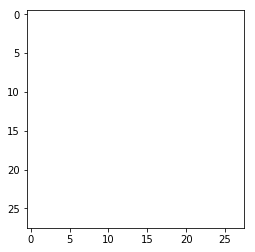

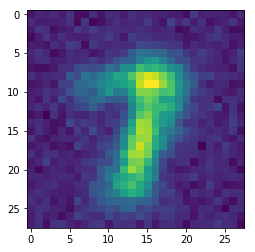

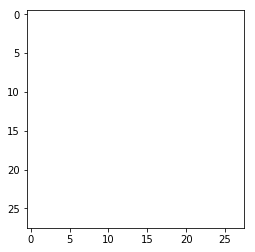

In [0]:
#  SKIP THIS!!!!!

# embed the signal in noise

# - get a random test digit and add it to random noise
# - feed to the net and collect the answer
# - do record the averages

# Load data

# digit_p, digit_q =  1, 7


test = MNIST('./data', train=False, download=True , transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

data2 = test
# selecting number 0 zero only
tt = data2.targets[(data2.targets== digit_p) | (data2.targets== digit_q)]
tt[tt==digit_p] =  0
tt[tt==digit_q] = 1
dd = data2.data[(data2.targets== digit_p) | (data2.targets== digit_q)] 
# tt = data.targets[(data.targets== 1)]
# dd = data.data[(data.targets== 1)] 

data2.targets = tt
data2.data = dd
test_loader = torch.utils.data.DataLoader(data2, batch_size=100, shuffle=True, drop_last = True)
# Num batches
# num_batches = len(train_loader)
print((tt==0).sum(), (tt==1).sum())

# model.cuda()
model.eval()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data = test_data/256

test_targets = test.targets.cuda()
#     output = model(evaluate_x[:,None,...])



batch_size = test_data.size(0)
all_size = batch_size * 1

stats = dict()
for i in range(4):
    stats[i] = 0

iters = 100
    
# avgs = torch.zeros(iters, 2, 28*28)

p0 = [] 
p1 = [] 


weight = 0.02

for kk in range(iters):
  print(kk)
  
  z = torch.rand(all_size, 28, 28) #.cuda()  
  z.cuda()

  z = (1*z + weight*test_data)/ (weight+1)  # noise + stim
  pred = model(z[:,None,...].cuda())
  
  pred = pred.squeeze()
  
#   idx = (pred.squeeze()==0) & (test_targets==0)
  
#   z[idx].mean(dim=0)
#   import pdb; pdb.set_trace() 
  idx0 = (pred==0)   # predicted 1
  p0.append(z[idx0].mean(dim=0))
  

  idx1 = (pred==1)   # it predicted 7
  p1.append(z[idx1].mean(dim=0))

  
  stats[0] += idx0.sum()
  stats[1] += idx1.sum()
#   for i in range(2):
#     stats[i] += torch.sum(pred==i)
  

#   import pdb; pdb.set_trace()
# for i in range(4):
p0 = torch.stack(p0)#.squeeze()  
a = torch.mean(p0, dim=0)
plt.figure()
plt.imshow(a)

p1 = torch.stack(p1)#.squeeze()  
b = torch.mean(p1, dim=0)
plt.figure()
plt.imshow(b)



# classification_img = (a+b) - (c+d)
# plt.figure()
# plt.imshow(classification_img)

classification_img = (b) - (a)   #   (predicted sevens - predicted ones)
plt.figure()
plt.imshow(classification_img)

print(stats)

In [0]:
# y_pred.max()
# z[k:k+batch_size][0].max()
y_pred.max()
pred.max()

test.targets.max()
y_pred = model(stimulus.cuda())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


ValueError: ignored

In [0]:
# y_pred[y_pred <= 0.5]= 0
y_pred.max()
# stimulus[0].max()

tensor(1., device='cuda:0', grad_fn=<MaxBackward1>)

In [0]:
stats

{0: tensor(54759), 1: tensor(377841)}

tensor(0.9565)

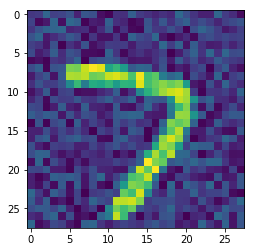

In [0]:
plt.imshow(stimulus[4])
stimulus[0].max()
# stimulus

In [0]:
avgs.shape
weight


0.05

tensor(8.2135e-05) tensor(0.9993)
tensor(8.2135e-05) tensor(0.9993)
tensor(0.) tensor(0.9961)
tensor(0.0032) tensor(1.0000)
tensor(0.0032) tensor(1.0000)
tensor(0.) tensor(0.9961)


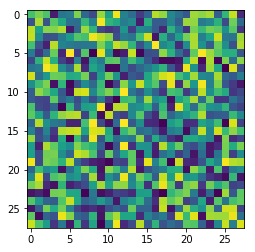

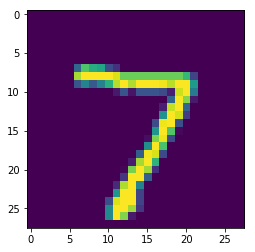

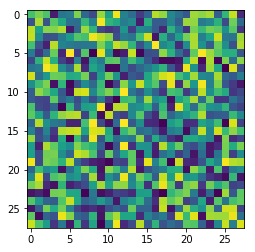

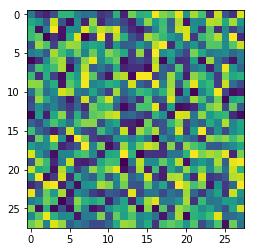

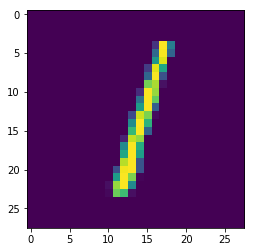

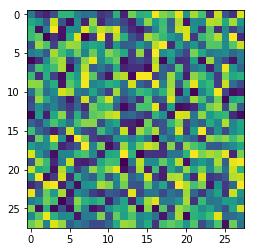

In [0]:
# stats
weight = 0

for p in range(2):
#   pred.shape
  # z.shape
  z = torch.rand(all_size, 28, 28)

  # plt.imshow(stimulus[1])
  plt.figure()
  kk = (1*z[p] + weight*test_data[p])/ (weight+1)
#   (test_data[110] + 5*z[p])/5

  # plt.imshow(z[k:k+batch_size][0])
  plt.imshow(kk)
  # batch_size
  # z[k:k+batch_size][0].shape
  # z[k:k+batch_size][0].max()
  print(kk.min(), kk.max())
  print(z[p].min(), z[p].max())
  print(test_data[p].min(), test_data[p].max())

  plt.figure()
  plt.imshow(test_data[p])
  
  plt.figure()
  plt.imshow(z[p])
  

In [0]:
# a.sum()
test_data = test.data.type(torch.FloatTensor) # Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
test_data.shape

torch.Size([2167, 28, 28])

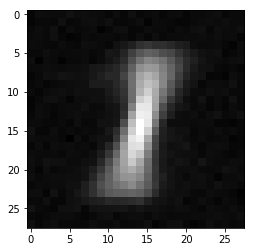

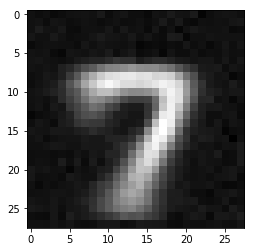

In [0]:
# plot the avg
dd = torch.mean(avgs, dim=0)
#dd = dd - grand_mean
for kk in range(2):
  
  fig = plt.figure()
  a = dd[kk]
  a = a.view(-1,28)
#   b = model(a[None,None,...].cuda())

  #a = torch.nn.functional.log_softmax(a)# torch.nn.functional.softmax(a)
#   c = b.data.max(1)[1]
#   plt.title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} -  size-gt: {stats[kk]}')  
  plt.imshow(a, cmap = 'gray')
#   fig.savefig(os.path.join(save_path, str(kk)+'-mlp.png'))

**End of the signal in NOISE analysis**

In [0]:
EPOCHS = 30
losses = []

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data, target = Variable(data), Variable(target)
        
        if cuda:
            data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data) 

        # Calculate loss
        loss = F.cross_entropy(y_pred, target)
        losses.append(loss.cpu().data)
#         losses.append(loss.cpu().data[0])        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.cpu().data), 
                end='')
    # Eval
    evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
    evaluate_y = Variable(test_loader.dataset.test_labels)
    if cuda:
        evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

    model.eval()
    output = model(evaluate_x[:,None,...])
    pred = output.data.max(1)[1]
    d = pred.eq(evaluate_y.data).cpu()
    accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        len(train_loader.dataset), 
        len(train_loader.dataset),
        100. * batch_idx / len(train_loader), 
        loss.cpu().data,
        accuracy*100,
        end=''))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


 Train Epoch: 1/30 [256/60000 (0%)]	Loss: 2.279951

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/pin_memory.py", line 21, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 276, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  File "/usr/lib/python

KeyboardInterrupt: ignored

In [0]:
save_path = 'drive/My Drive/classification_images'
torch.save(model,os.path.join(save_path, 'mlp.pth'))
torch.save(model.state_dict(), os.path.join(save_path, 'mlp_state.pth'))

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
save_path

'drive/My Drive/classification_images'

In [0]:
evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
evaluate_y = Variable(test_loader.dataset.test_labels)
if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

model.eval()
output = model(evaluate_x[:,None,...])
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]

print('Accuracy:', accuracy*100)

Accuracy: tensor(98.3000, dtype=torch.float64)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())


array([[ 971,    0,    1,    0,    0,    1,    2,    1,    1,    2],
       [   1, 1125,    0,    0,    1,    0,    2,    3,    0,    2],
       [   0,    3, 1014,    3,    3,    0,    1,    7,    3,    1],
       [   1,    1,    1,  994,    1,    2,    1,    2,    4,    3],
       [   0,    0,    1,    0,  959,    0,    1,    0,    1,    5],
       [   1,    1,    0,    4,    1,  874,    6,    0,    0,    2],
       [   2,    2,    2,    0,    4,    2,  940,    0,    1,    1],
       [   1,    1,    6,    2,    3,    2,    0, 1006,    3,    2],
       [   2,    2,    6,    3,    2,    9,    5,    5,  961,    5],
       [   1,    0,    1,    4,    8,    2,    0,    4,    0,  986]])

In [0]:
batch_size = 10000
all_size = 100000

stats = dict()
for i in range(10):
    stats[i] = 0
  
    
avgs = torch.zeros(100, 10, 28*28)

for kk in range(100):
  print(kk)
  
#   z = torch.rand(all_size, 1, 28, 28)*2 -1 #.cuda()
  z = torch.rand(all_size, 1, 28, 28) #.cuda()
  
  z.cuda()
  #plt.imshow(z[1].reshape(28,28))


  all_preds = []
  all_idx = torch.ones(all_size, dtype = torch.uint8)
  for k in range(0,all_size, batch_size):
      y_pred = model(z[k:k+batch_size].cuda())
      y_pred[y_pred <= 0]= 0

      indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
      indices[torch.mean(y_pred, dim =1)==0] = 0 

      all_idx[k:k+batch_size] = indices 
      pred = y_pred[indices==1].data.max(1)[1]

      all_preds.append(pred)

  pred = torch.cat(all_preds)

  for i in range(10):
    stats[i] += torch.sum(pred==i)
  
  z = z[all_idx]
  for i in range(10):
      a = torch.mean(z[pred==i] , dim=0) 
      avgs[kk, i] = a.reshape(28*28)


0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [0]:
z = torch.rand(1000000, 784)
grand_mean = torch.mean(z,dim=0)

In [0]:
(indices==1).sum()
y_pred.size(0)
y_pred[1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       grad_fn=<SelectBackward>)

In [0]:
stats

{0: tensor(27958, device='cuda:0'),
 1: tensor(0, device='cuda:0'),
 2: tensor(5183612, device='cuda:0'),
 3: tensor(2409211, device='cuda:0'),
 4: tensor(0, device='cuda:0'),
 5: tensor(2240440, device='cuda:0'),
 6: tensor(51097, device='cuda:0'),
 7: tensor(81470, device='cuda:0'),
 8: tensor(6207, device='cuda:0'),
 9: tensor(5, device='cuda:0')}

In [0]:
grand_mean.shape

torch.Size([784])

In [0]:
b.data.max(1)[1]
b
a.shape

torch.Size([28, 28])

In [0]:
for i in range(10):
    print(torch.sum(pred==i))  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_sca

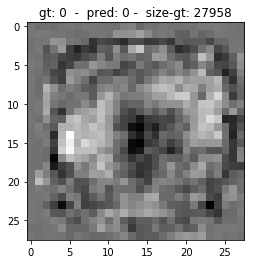

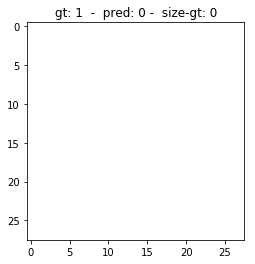

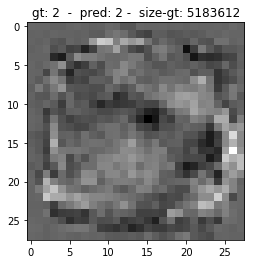

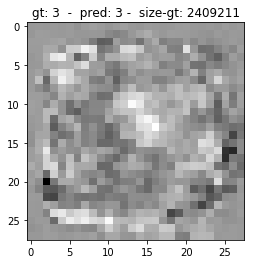

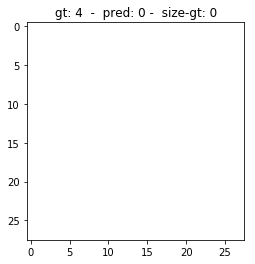

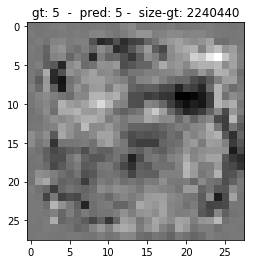

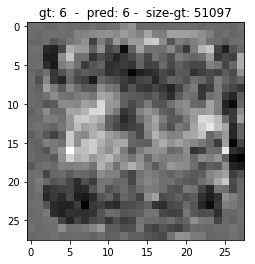

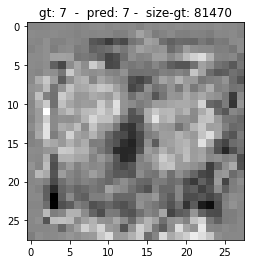

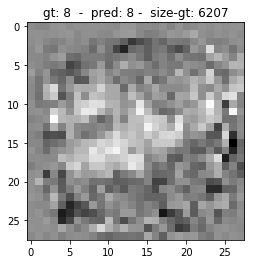

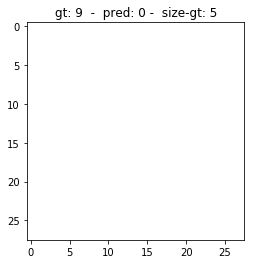

In [0]:
dd = torch.mean(avgs, dim=0)
#dd = dd - grand_mean
for kk in range(10):
  
  fig = plt.figure()
  a = dd[kk]
  a = a.view(-1,28)
  b = model(a[None,None,...].cuda())

  #a = torch.nn.functional.log_softmax(a)# torch.nn.functional.softmax(a)
  c = b.data.max(1)[1]
  plt.title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} -  size-gt: {stats[kk]}')  
  plt.imshow(a, cmap = 'gray')
  fig.savefig(os.path.join(save_path, str(kk)+'-mlp.png'))
  

In [0]:
for i in range(10):
    print(torch.sum(pred==i))

tensor(236, device='cuda:0')
tensor(3, device='cuda:0')
tensor(1874, device='cuda:0')
tensor(160, device='cuda:0')
tensor(2689, device='cuda:0')
tensor(22, device='cuda:0')
tensor(44, device='cuda:0')
tensor(81, device='cuda:0')
tensor(93796, device='cuda:0')
tensor(98, device='cuda:0')


In [0]:
# ls
from google.colab import files
files.download('./*.png')


FileNotFoundError: ignored

In [0]:
ls drive/My\ Drive/classification_images


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


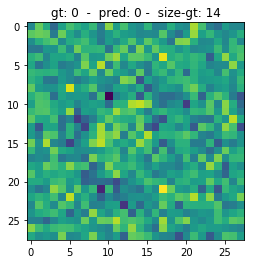

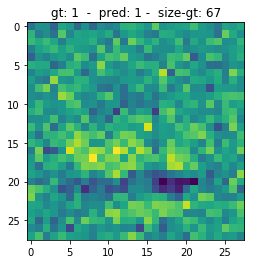

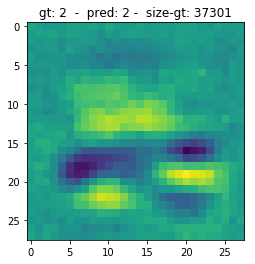

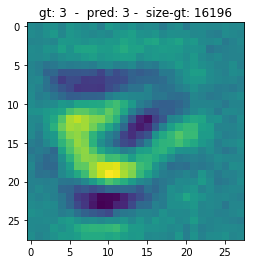

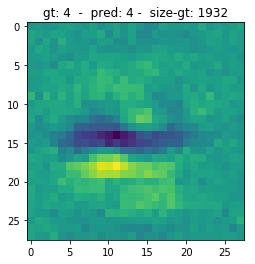

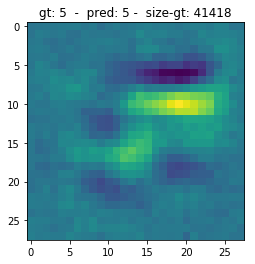

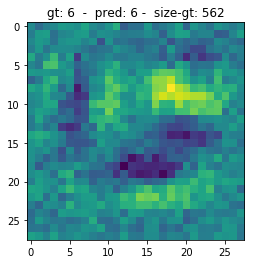

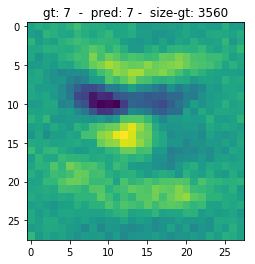

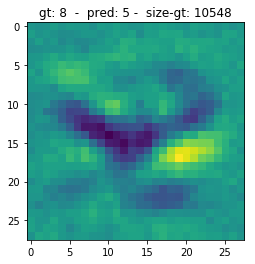

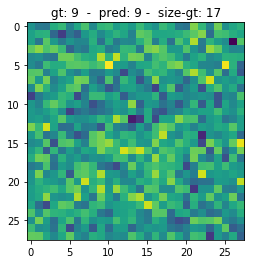

In [0]:
# z = z[all_idx]
pred = torch.cat(all_preds)
for i in range(10):
    plt.figure()
    a = torch.mean(z[pred==i] , dim=0) 
    a = a.view(-1,28)
    b = model(a[None,None,...].cuda())
    c = b.data.max(1)[1]
    plt.title(f'gt: {str(i)}  -  pred: {str(c.cpu().data[0].numpy())} -  size-gt: {z[pred==i].size(0)}')
    plt.imshow(1-a)

In [0]:
for i in range(z.size(0)):
  print(torch.max(data[1,0]))

tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='c

KeyboardInterrupt: ignored